<a href="https://colab.research.google.com/github/mariadelmark/OnlineShopperIntention/blob/main/OnlineShopperIntention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICIENDO VENTAS SEGÚN EL TIPO DE TRÁFICO DE UN SITIO WEB USANDO UN ENFOQUE DE MACHINE LEARNING

## INTRODUCCIÓN

El tráfico tipo, o "Traffic type", es crucial en marketing para identificar las fuentes de visitantes en un sitio web y comprender a los posibles clientes potenciales. Analizando el tráfico tipo, se obtienen conocimientos sobre el comportamiento, intereses y necesidades de la audiencia objetivo.

Por ejemplo, si la mayoría del tráfico proviene de redes sociales, sugiere que la audiencia objetivo es activa en esas plataformas y podría responder bien a campañas de marketing en redes sociales. Si un sitio web recibe muchas visitas desde motores de búsqueda, indica que la audiencia objetivo busca activamente información o productos relacionados, y mejorar el SEO sería efectivo para atraer nuevos clientes.

Es importante analizar el valor de página, o "Page Value", según el tipo de tráfico para comprender cómo se comportan los visitantes de diferentes fuentes. Por ejemplo, un alto Page Value en el tráfico orgánico indica que es probable que esos visitantes interactúen con el sitio web y generen ingresos. Por otro lado, un bajo Page Value en el tráfico de redes sociales sugiere un menor interés y menos probabilidades de generar ingresos.

Al comprender la relación entre el tipo de tráfico y los ingresos generados, se pueden optimizar los esfuerzos de marketing al enfocarse en las fuentes de tráfico más rentables. También se pueden identificar áreas de mejora en el sitio web para aumentar la tasa de conversión y generar más ingresos por visita.

Para analizar esta relación, se utiliza el valor promedio de página ("Page Value") para cada tipo de tráfico. Esta medida proporciona una visión general de los valores típicos asociados con cada tipo de tráfico, lo que permite identificar cuáles generan un mayor o menor valor de página.

Además, se consideran métricas como la tasa de rebote ("Bounce Rate") y la tasa de salida ("Exit Rate"). La tasa de rebote mide el porcentaje de visitantes que abandonan el sitio después de una sola interacción, mientras que la tasa de salida se refiere al porcentaje de salidas desde una página específica. Ambas métricas son útiles para evaluar el rendimiento del sitio web y optimizar las páginas adecuadas.

En resumen, el análisis del tráfico tipo y su relación con los ingresos permite tomar decisiones más informadas en términos de marketing y mejoras en el sitio web para maximizar las ventas y la satisfacción del cliente.

Se utiliza un dataset de: Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks. Neural Comput & Applic 31, 6893–6908 (2019). https://doi.org/10.1007/s00521-018-3523-0

## CARGA DE DATOS Y DE PAQUETES A UTILIZAR

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import statsmodels
from scipy import stats
import statsmodels.stats.api as sms


archivo = '/content/online_shoppers_intention.csv'

df = pd.read_csv(archivo)

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# Se chequea que el dataset se haya cargado correctamente
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8293 entries, 9192 to 10357
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           8293 non-null   int64  
 1   Administrative_Duration  8293 non-null   float64
 2   Informational            8293 non-null   int64  
 3   Informational_Duration   8293 non-null   float64
 4   ProductRelated           8293 non-null   int64  
 5   ProductRelated_Duration  8293 non-null   float64
 6   BounceRates              8293 non-null   float64
 7   ExitRates                8293 non-null   float64
 8   PageValues               8293 non-null   float64
 9   SpecialDay               8293 non-null   float64
 10  Month                    8293 non-null   int64  
 11  OperatingSystems         8293 non-null   int64  
 12  Browser                  8293 non-null   int64  
 13  Region                   8293 non-null   int64  
 14  TrafficType         

## ANÁLISIS DE VARIABLES A UTILIZAR

In [ ]:
df.describe()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
# Se chequea la correlación entre distintas variables
df.corr()

<ipython-input-98-219d72e7b9c4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


Las características relevantes que usaremos en este caso son:

- **Revenue:** si se concretó una venta durante la visita; variable clave de interés. --- VARIABLE TARGET

- **Page Values:**  es una métrica utilizada por Google Analytics para medir el valor de una página del sitioweb y compararla con la conversión que tuvo. Permite determinar cuánto Revenue una página está generando basado en el número de personas que visitó la página.

- **Traffic type:** Existen varios tipos de tráficos pero el dataset no utiliza labels sólo valores numéricos para separarlos por lo cual no se los puede distinguir.

- **Visitor Type :** indica si la visita al sitio web es de un visitante nuevo o recurrente.

- **Administrative, Administrative Duration, Informational, Informational Duration, Product Related and Product Related Duration:** representan el número de diferentes tipos de páginas que fueron visitadas en una sesión y la cantidad de tiempo que se pasó en cada categoría de página.

Sin embargo se decide dejar a las variables Operating Systems, Browser and Region ya que son de ayuda para definir el tipo de tráfico que recibe un sitio web.

In [ ]:
#se asigna una etiqueta a cada mes para que al utilizar la nueva columna quede ordenado
month_dict = {'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

df['Month_Ordered'] = df['Month'].map(month_dict)

df = df.sort_values(by='Month_Ordered')

df = df.reset_index(drop=True)

In [ ]:
# Se convierte Revenue a integer
df['Revenue'] = df['Revenue'].astype(int)


# EDA




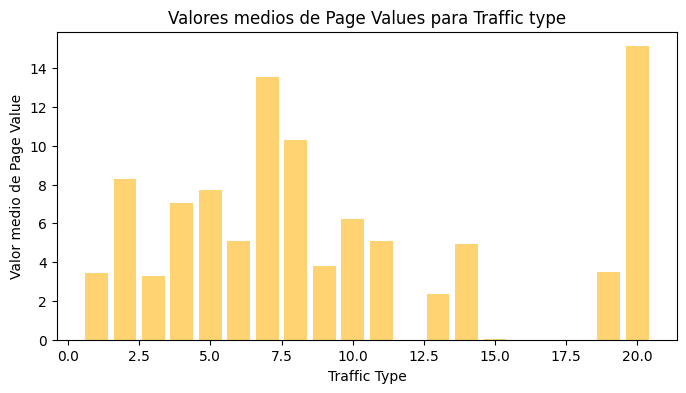

In [ ]:
page_values = df.groupby('TrafficType')['PageValues'].mean()

fig, ax = plt.subplots(figsize=(8, 4))

colors = ['#FFD372'] * len(page_values)

ax.bar(page_values.index, page_values.values, color=colors)

ax.set_xlabel('Traffic Type')
ax.set_ylabel('Valor medio de Page Value')
ax.set_title('Valores medios de Page Values para Traffic type')

plt.show()

Si bien a simple vista parece que algunos tipos de tráficos tiene mejor Page value. También se analiza el conteo de incidencias de cada tipo de tráfico para analizar la relevancia según el porcentaje que representa del total de visitas.

In [ ]:
df.describe()
#se chequea cuantos valores hay de cada uno
traffic_type_counts = df['TrafficType'].value_counts()
print(traffic_type_counts)

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64


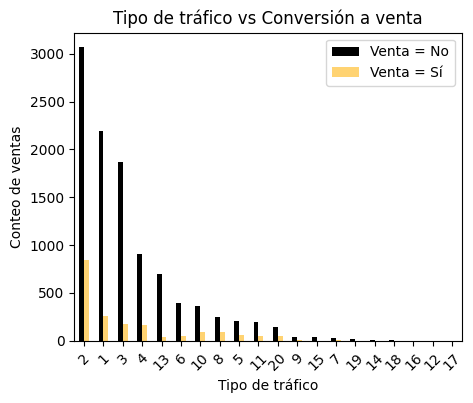

In [ ]:
rev_0_count = df.loc[df['Revenue'] == 0, 'TrafficType'].value_counts()
rev_1_count = df.loc[df['Revenue'] == 1, 'TrafficType'].value_counts()

df_counts = pd.concat([rev_0_count, rev_1_count], axis=1)
df_counts.columns = ['Venta = No', 'Venta = Sí']

custom_yellow = '#FFD372'

fig, ax = plt.subplots(figsize=(5, 4))

df_counts.plot(kind='bar', ax=ax, color=['black', custom_yellow])
ax.set_xlabel('Tipo de tráfico')
ax.set_ylabel('Conteo de ventas')
ax.set_title('Tipo de tráfico vs Conversión a venta')
plt.xticks(rotation=45)
plt.show()


Con el fin de evaluar tendencias estacionales se evalúa las ventas por mes. Hay más ventas, Revenue=True, durante Marzo y Mayo, no existiendo información para Abril. De Julio a Septiembre parece haber un estancamiento del número de ventas. Hay un pico de ventas en Noviembre coincidiendo con el Black Friday.


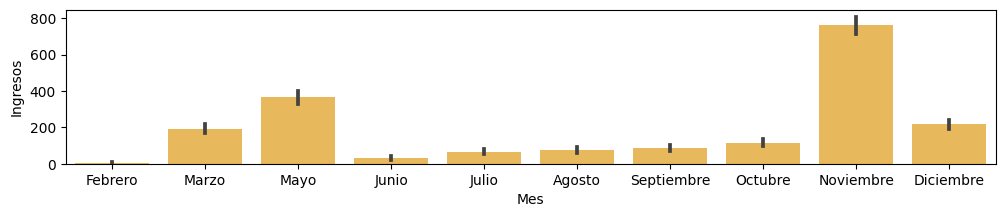

In [ ]:
df['Revenue'] = df['Revenue'].astype(int)

sns.barplot(data=df, x='Month_Ordered', y='Revenue', estimator=np.sum, color='#FFBF46')

ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(12, 2)

labels = ['Febrero', 'Marzo', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
ax.set_xticklabels(labels)

plt.xlabel('Mes')
plt.ylabel('Ingresos')
plt.show()



In [ ]:
df_ventas=df[['Month_Ordered', 'VisitorType']]
df_ventas.head()

,Month_Ordered,VisitorType
0,2,Returning_Visitor
1,2,Returning_Visitor
2,2,Returning_Visitor
3,2,Returning_Visitor
4,2,Returning_Visitor


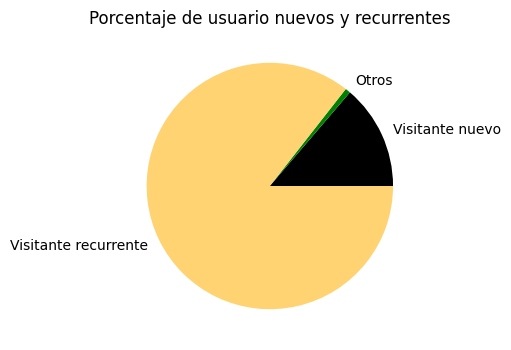

In [ ]:
grouped = df_ventas.groupby('VisitorType')['VisitorType'].count()

plt.figure(figsize=(4, 4))

colors = ['black', 'green', '#FFD372']
labels = ['Visitante nuevo', 'Otros', 'Visitante recurrente']

plt.title('Porcentaje de usuario nuevos y recurrentes')
plt.pie(x=grouped, labels=labels, colors=colors)
plt.show()

In [ ]:
mode = pd.Series(grouped).mode()
print('Mode:', mode)


Mode: 0       85
1     1694
2    10551
Name: VisitorType, dtype: int64


Al ser Returning Visitor y New Visitor variables categóricas se estudia la moda para analizar los valores que más aparecen.

*   Returning Visitor tiene una moda de 10551.
*   New Visitor tiene una moda de 1694.

Resulta evidente que la cantidad de nuevos visitantes es mínima respecto a los visitantes recurrentes, representando sólo el 13.7% del total de visitas.



Siguiendo con lo anterior, se evalua si cada tipo de cliente genera Revenue o no y si es durante un día de semana o no.La mayoría de las ventas se realizó durante un día de semana, Weekend=False.



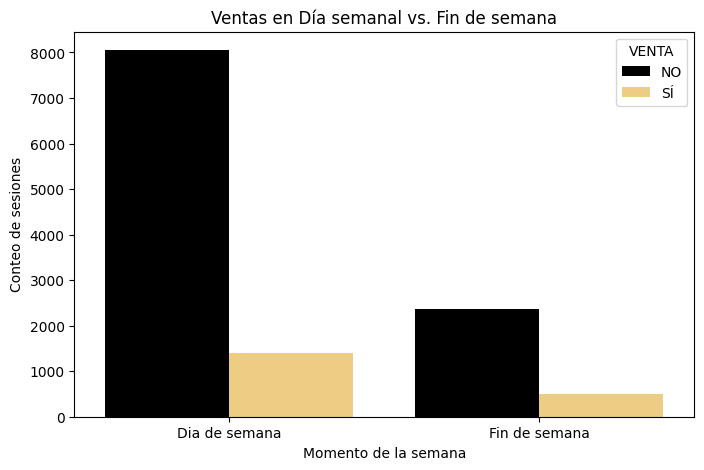

In [ ]:
custom_palette = {0: 'black', 1: '#FFD372'}

sns.countplot(data=df, x='Weekend', hue='Revenue', palette=custom_palette)

plt.xticks([0, 1], ['Dia de semana', 'Fin de semana'])

plt.xlabel('Momento de la semana')
plt.ylabel('Conteo de sesiones')
plt.title('Ventas en Día semanal vs. Fin de semana')
plt.legend(title='VENTA', labels=['NO', 'SÍ'])

plt.show()


In [ ]:
bounce_rate_gt_zero = df[df['BounceRates'] > 0]['BounceRates'].count()
total_sessions = df.shape[0]
percent_gt_zero = bounce_rate_gt_zero / total_sessions * 100

print(f"El porcentaje de sesiones con un bounce rate mayor a 0 es: {percent_gt_zero:.2f}%")

El porcentaje de sesiones con un bounce rate mayor a 0 es: 55.25%


Se evalua númericamente la correlación entre Bounce Rates y Exit Rates para luego graficarla utilizarla como referencia en un scatter plot entre ambas funciones.

In [ ]:
corr = df['BounceRates'].corr(df['ExitRates'])

print(f"Correlación entre BounceRates y ExitRates: {corr:.3f}")

Correlación entre BounceRates y ExitRates: 0.913


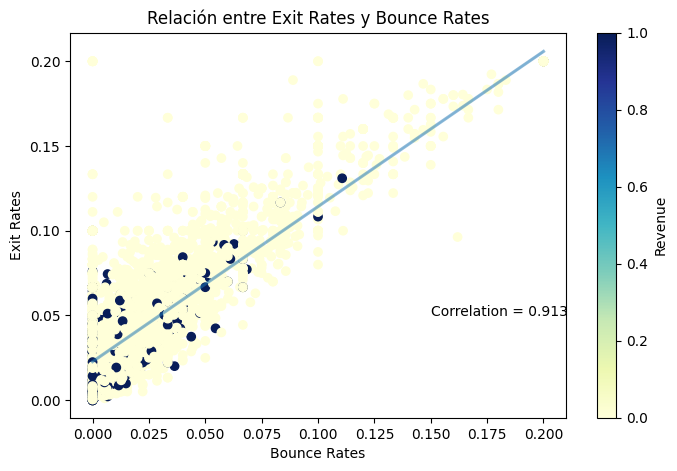

In [ ]:
import matplotlib.cm as cm

scatter_plot = plt.scatter(x=df['BounceRates'], y=df['ExitRates'], c=df['Revenue'], cmap=cm.YlGnBu)
plt.rcParams['figure.figsize'] = (8, 5)

# Set the colors for the scatter plot
scatter_plot.set_cmap(cm.YlGnBu)
scatter_plot.set_clim(0, 1)

cbar = plt.colorbar(scatter_plot)
cbar.set_label('Revenue')

# Se le agrega la línea de regresión
sns.regplot(x=df['BounceRates'], y=df['ExitRates'], scatter=False, line_kws={'alpha': 0.5})

plt.text(x=0.15, y=0.05, s='Correlation = 0.913')

plt.xlabel('Bounce Rates')
plt.ylabel('Exit Rates')
plt.title('Relación entre Exit Rates y Bounce Rates')


plt.show()


Dado que Exit Rate es una medida más específica del comportamiento de los usuarios que Bounce Rate, es más relevante utilizarla como variable dependiente. Esto podría ayudar a evaluar patrones o relaciones entre el sitio y los visitantes que solo se van para saber qué páginas optimizar

# INSIGHTS Y PRIMERAS RECOMENDACIONES


Con el fin de mejorar los resultados obtenidos se recomienda.

* Realizar un test A/B para mejorar el sitio web de tal manera que sea intuitivo.

* Mejorar la estrategia de SEO para que las visitas que lleguen a través de motores de búsqueda encuentren el contenido correcto.

* Mejorar el embudo de venta. Dado que la proporción de visitantes nuevos es baja, se recomienda enfocar las estrategias en primera instancia en generar brand awareness. Si bien es importante mantener clientes recurrentes, al acceder a un mercado mayor se puede generar un revenue mayor.

* Mejores estrategias de conversión. Haciendo foco en la atracción de clientes durante el fin de semana.

* Hacer uso de eventos de ventas como el Black Friday para atraer a nuevos clientes.




# BALANCEO DE CLASES

Ya que el dataset está desbalanceado, de las 12,330 sesiones el 84.5% (10,422), no resultaron en venta, es decir: Revenue=0. Al ser una diferencia demasiado grande se opta por el método de Undersampling y se eliminan aleatoriamente instancias negativas para alcanzar un porcentaje de 75% de instancias negativas contra un 25% de instancias positivas.

In [ ]:
# se divide el dataset en 2
df_false = df[df['Revenue'] == 0]
df_true = df[df['Revenue'] == 1]

# Se determina el porcentaje que queremos tener al final
num_instances_false = int(0.75 * len(df_false))
num_instances_true = int(0.25 * len(df_true))

#Se eligen al azar las instancias
df_false_sampled = df_false.sample(n=num_instances_false, random_state=42)
df_true_sampled = df_true.sample(n=num_instances_true, random_state=42)

#Acá nos queda el df nuevo concatenado
df_balanced = pd.concat([df_false_sampled, df_true_sampled])

#Sobreescibo el anterior para no tener que cambiarlo en todo lo que hice
df = df_balanced


# TEST DE HIPÓTESIS


Se testea la hipótesis de que se generan más ventas los días especiales. Es decir SpecialDay>0 hay más ventas que SpecialDay=0.

In [ ]:
import scipy.stats as stats


# Se divide la data en 2: SpecialDays y non-SpecialDays
special_days = df[df['SpecialDay'] > 0]['Revenue']
non_special_days = df[df['SpecialDay'] == 0]['Revenue']

# Se corre un t-test para comparar las ventas entre los 2 grupos
t_statistic, p_value = stats.ttest_ind(special_days, non_special_days)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: -5.347603796178193
P-Value: 9.150144110676275e-08


En general, los resultados indican que existe una diferencia significativa en los ingresos entre los días especiales y los días no especiales. La estadística T negativa sugiere que, en promedio, los ingresos en días especiales son más bajos que en días no especiales. El pequeño valor P proporciona una fuerte evidencia para rechazar la hipótesis nula y sugiere que la diferencia observada no se debe al azar.

# FEATURE ENGINEERING: PCA



In [ ]:
# primero hacemos el encoding con LabelEncoder

from sklearn.preprocessing import LabelEncoder

categorical_features = df.select_dtypes(include='object')

label_encoder = LabelEncoder()

for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])


In [ ]:
from sklearn.decomposition import PCA

numerical_features = df.select_dtypes(include='number')

pca = PCA(n_components=2)  # No sé, elegí 2

pca_result = pca.fit_transform(numerical_features)


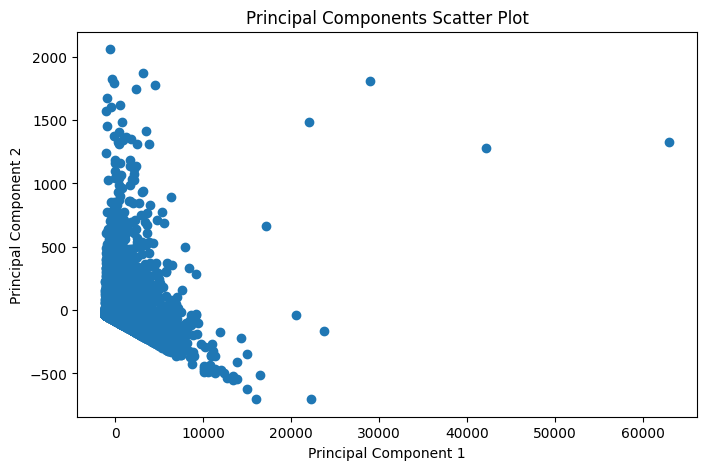

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of the principal components
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components Scatter Plot')
plt.show()


In [ ]:
#Le agrego los componenentes al df

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8293 entries, 9192 to 10357
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           8293 non-null   int64  
 1   Administrative_Duration  8293 non-null   float64
 2   Informational            8293 non-null   int64  
 3   Informational_Duration   8293 non-null   float64
 4   ProductRelated           8293 non-null   int64  
 5   ProductRelated_Duration  8293 non-null   float64
 6   BounceRates              8293 non-null   float64
 7   ExitRates                8293 non-null   float64
 8   PageValues               8293 non-null   float64
 9   SpecialDay               8293 non-null   float64
 10  Month                    8293 non-null   int64  
 11  OperatingSystems         8293 non-null   int64  
 12  Browser                  8293 non-null   int64  
 13  Region                   8293 non-null   int64  
 14  TrafficType         

#  ELECCIÓN DE MODELO DE CLASIFICACIÓN PARA ENTRENAR EL MODELO

SELECCIÓN DE MODELO DE BENCHMARK

Un modelo de benchmark se refiere a un punto de referencia o estándar utilizado para comparar el desempeño o la eficacia de otros modelos o enfoques. El modelo de benchmark generalmente es conocido por su buen desempeño y se utiliza como punto de referencia para medir si los nuevos modelos son capaces de superarlo o si presentan un rendimiento comparable. En nuestro caso elegimos usar un modelo de Regresión Logísitica dado que es un modelo flexible que permite trabajar con variables independientes de diferentes tipos (categóricas, binarias o continuas). En el caso del tipo de tráfico, una variable categórica, la regresión logística puede manejar eficazmente este tipo de datos y proporcionar predicciones precisas basadas en ellos.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# Separate the features from the target variable
X = df.drop(['Revenue'], axis=1)
y = df['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")
print(f"ROC-AUC score: {roc_auc:.2f}")


Accuracy: 0.94
Precision: 0.65
Recall: 0.23
F1 score: 0.34
ROC-AUC score: 0.61


>>> PRIMER MODELO: ÁRBOL DE DECISIÓN

El primer modelo de clasificación que se evalúa es el árbol de decisión. Se lo entrena y se realizan predicciones en base al set de prueba, se calcula el accuracy y otras métricas como precisiòn, recall y puntaje de F1.

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Separate the features from the target variable
X = df.drop(['Revenue'], axis=1)
y = df['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")
print(f"ROC-AUC score: {roc_auc:.2f}")



Accuracy: 0.92
Precision: 0.39
Recall: 0.45
F1 score: 0.42
ROC-AUC score: 0.70


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1482   73]
 [  57   47]]


Se procede a interpretar la matriz de confusión:

 * True positives (TP): 237 - el número de casos positicos que el modelo predijo correctamente como tal, es decir, el número de clientes que realizó una compra y el modelo lo identificó correctamente.

 * True negatives (TN): 1890 - el número de casos negativos que el modelo predijo correctamente. Para nuestro modelo, la cantidad de clientes que no realizó una compra y que el modelo identificó correctamente.

 * False positives (FP): 165 - el número de casos negativos que el modelo predijo como positivos. Para el modelo, el número de clientes que no realizó una compra pero que el modelo predijo incorrectamente que iba a realizar una compra.

 * False negatives (FN): 174 - el número de casos positivos que el modelo predijo como positivo que el modelo incorrectamente predijo como positivos. En nuestro caso, la cantidad de clientes que realizó una compra pero que el modelo incorrectamente predijo que no había realizado una.

 Basandonos en estos resultados la precisión, el recall y el puntaje de F1.

* Precision: TP / (TP + FP) = 237 / (237 + 165) = 0.59
* Recall: TP / (TP + FN) = 237 / (237 + 174) = 0.58
* F1 score: 2 * Precision * Recall / (Precision + Recall) = 2 * 0.59 * 0.58 / (0.59 + 0.58) = 0.58

Estos resultados indican que el modelo tiene una precisión de 0.59, lo que significa que de todas las instancias que el modelo predijo como positivas, solo el 59%  era realmente positivo. El recall de 0.58 indica que el modelo identificó solo el 58% de todas las instancias positivas.
El puntaje de F1 de 0.58 indica que el modelo no está teniendo una buena performance en términos de balancear la precisión y el recall. Un puntaje de F1 más cercano a 1 indica una mejor performance.

Un puntaje de AUC también se maneja entre un rango de 0 y 1, siendo esta última una performance perfecta. El modelo obtuvo 0.75,lo cual indica que el modelo tiene un 75 % de posibilidades de clasificar una instancia positiva elegida al azar por encima de una instancia negativa elegida al azar, lo que es mejor que la probabilidad aleatoria (0,5) pero no perfecta.

En este caso el modelo tiene un accuracy de 0.86 que a primera vista resulta relativamente alto. Sin embargo, al analizar la performance en otras métricas, a saber precisión, recall y puntaje de F1 se empiezan a notar fallas en el modelo. Puntualmente, la baja precisión y el recall indican que el modelo está incorrectamente prediciendo instancias como negativas cuando deberían ser positivas.

Se procede a evaluar otros modelos de clasificación con el fin de elegir el que sea màs acorde para los resultados que se buscan.

>>> SEGUNDO MODELO: KNN

El segundo modelo de clasificación a evaluar es KNN (K-Nearest Neighbors), es un tipo de aprendizaje basado en instancias donde el modelo aprende la función encontrando el ejemplo de entrenamiento más cercano en el espacio de la feature. Dada una nueva observación de entrada, KNN encuentra los K ejemplos de entrenamiento más cercanos (vecinos) en el espacio de características y clasifica la observación de entrada en función de la clase mayoritaria de sus K vecinos más cercanos.


Para mejorar la performance del modelo se usa OneHotEncoder en lugar de getdummies para reducir el riesgo de overfitting. También se deicidió usar StandardScaler para normalizar los datos, sin este paso, las características con grandes magnitudes pueden tener un impacto desproporcionado en la métrica de distancia utilizada en KNN, lo que dificulta que el algoritmo identifique correctamente instancias similares. StandardScaler ayuda a evitar este problema al garantizar que cada instancia contribuya por igual a la métrica de distancia.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Split the dataset into input features and target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Convert all columns to string type
X.columns = X.columns.astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert all columns to string type
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')


Accuracy: 0.954
Precision: 0.792
Recall: 0.365
F1 Score: 0.500


In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[1545   10]
 [  66   38]]


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)

print(f"ROC-AUC score: {roc_auc:.2f}")

ROC-AUC score: 0.68


Este modelo también tiene una accuracy relativamente alta, 0.866. También se nota una mejora en la Precisión, de todas las instancias que el modelo clasificó como positivas el 71.2% eran realmente positivas lo cual representa una mejora respecto al modelo de árbol de decisión.

No obstante, las otra métricas dieron peores resultados que el primer modelo probado:

- Recall: 0.331
- F1 Score: 0.452
- ROC-AUC score: 0.65

El puntaje de  ROC-AUC se acerca todavía más a la probabilidad aleatoria (0,5) en vez de acercarse al puntajte perfecto de 1.
El hecho de que algunos tipos de tráfico tengan más instancias que otros es lo que podría estar provocando el puntaje de F1 tan bajo. Sin embargo, todavía se elige mantener todos los tipos de tráfico en vez de eliminar los que tengan menores instancias ya que se los considera a todos relevantes.
El recall mide que tan bien el modelo está identificando instancias positivas.En nuestro caso, Revenue=1 sería considerado una instacia positiva. Un recall de 0.331 indica que de todos los casos positivos, el modelo pudo predecir correctamente solo el 33.1% , 66.9% restante son casos positivos que el modelo clasificó como negativo.

Teniendo en cuenta que estas métricas surgen de cálculos sobre la matriz de confusión se realiza un breve análisis sobre la misma.

* True Positive (TP): 136. El cliente realizó una compra, Revenue=1, y el modelo lo predijo correctamente.
* False Positive (FP): 55. El cliente no realizó una compra, Revenue=0, pero el modelo predijo erroneamente que sí.
* True Negative (TN): 2000. El cliente no realizó una compra y el modelo lo predijo correctamente.
* False Negative (FN): 275. El cliente realizó una compra pero el modelo predijo que no lo haría.

A grandes rasgos el árbol de decisión obtuvo mejores resultados. 237 instancias de True Positive contra 136 predichas por el modelo de clasificaciónd de KNN. Sin embargo también tenía un número de False Positives más elevado, 165, lo cual significa que el modelo está clasificando incorrectamente como negativas a instancias positivas.

Teniendo en cuentas estos resultados se descarta KNN como modelo de clasificación para la problemática que se busca resolver.